In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [61]:
raw_data = pd.read_csv('data/feature_data.csv')

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [63]:
data = raw_data.drop(columns=['ID'])
data

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent
0             2  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   57   1617         0            0           663            1          0
1             2  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   60     27         2            0           113            3          1
2             2  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   49    776         0            1           312            2          0
3             2  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   30     53         1            1           139            3          1
4             4  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   33    422         1            1           161            3          1
...         ...      ...      ...       ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...       ...  ...    ...       ...          ...           ...          ...        ...
2207          2  61223.0        0         1       46       709         43              182               42               118           247                  2                9                    3                  4                  5             0             0             0             0             0         0         0   47   1341         1            1           381            3          1
2208          4  64014.0        2         1       56       406          0               30                0                 0             8                  7                8                    2                  5                  7             0             0             0             1             0         0         0   68    444         3            1            19            5          1
2209          2  56981.0        0         0       91       908         48              217               32                12            24                  1                2                    3                 13                  6             0             1             0             0             0         0         0   33   1241         0            0           155            1          0
2210          3  69245.0  

In [64]:
data.describe()

Education         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response          Age        Spent     Children  Living_With  Customer_For  Family_Size    Is_Parent
count  2212.000000    2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000      2212.000000      2212.000000       2212.000000   2212.000000        2212.000000      2212.000000          2212.000000        2212.000000        2212.000000   2212.000000   2212.000000   2212.000000   2212.000000   2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   2212.000000  2212.000000  2212.000000
mean      2.460669   51958.810579     0.441682     0.505877    49.019439   305.287523    26.329566       167.029837        37.648734         27.046564     43.925859           2.324593         4.088156             2.672242           5.806510           5.321429      0.073689      0.074141      0.072785      0.064195      0.013562     0.009042     0.150542    45.086347   607.268083     0.947559     0.645570    353.714286     2.593128     0.714286
std       1.004193   21527.278844     0.536955     0.544253    28.943121   337.322940    39.744052       224.254493        54.772033         41.090991     51.706981           1.924507         2.742187             2.927542           3.250939           2.425597      0.261323      0.262060      0.259842      0.245156      0.115691     0.094678     0.357683    11.701599   602.513364     0.749466     0.478449    202.494886     0.906236     0.451856
min       0.000000    1730.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000           0.000000         0.000000             0.000000           0.000000           0.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    18.000000     5.000000     0.000000     0.000000      0.000000     1.000000     0.000000
25%       2.000000   35233.500000     0.000000     0.000000    24.000000    24.000000     2.000000        16.000000         3.000000          1.000000      9.000000           1.000000         2.000000             0.000000           3.000000           3.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    37.000000    69.000000     0.000000     0.000000    180.000000     2.000000     0.000000
50%       2.000000   51371.000000     0.000000     0.000000    49.000000   175.500000     8.000000        68.000000        12.000000          8.000000     24.500000           2.000000         4.000000             2.000000           5.000000           6.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    44.000000   397.000000     1.000000     1.000000    356.000000     3.000000     1.000000
75%       3.000000   68487.000000     1.000000     1.000000    74.000000   505.000000    33.000000       232.250000        50.000000         33.000000     56.000000           3.000000         6.000000             4.000000           8.000000           7.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    55.000000  1048.000000     1.000000     1.000000    529.000000     3.000000     1.000000
max       4.000000  162397.000000     2.000000     2.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        262.000000    321.000000          15.000000        27.000000            28.000000          13.000000          20.000000      1.000000      1.000000      1.000000      1.000000      1.000000     1.000000     1.000000    74.000000  2525.000000     3.000000     1.000000    699.000000    

In [65]:
# Loại bỏ các cột không cần thiết
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                   'AcceptedCmp2', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'Complain', 'Living_With']

# Sử dụng phương pháp drop để loại bỏ cột
data = data.drop(columns=columns_to_drop)

# Kiểm tra lại dữ liệu sau khi loại bỏ
print(data.head())

   Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Response  Age  Spent  Children  Customer_For  Family_Size  Is_Parent
0          2  58138.0       58       635         88              546              172                88            88                8                   10                  4         1   57   1617         0           663            1          0
1          2  46344.0       38        11          1                6                2                 1             6                1                    1                  2         0   60     27         2           113            3          1
2          2  71613.0       26       426         49              127              111                21            42                8                    2                 10         0   49    776         0           312            2          0
3          2  26646.

In [66]:
def apply_scaler(data, scaler):  
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [67]:
data_scaled = apply_scaler(data, StandardScaler())
data_scaled

array([[-0.4588495 ,  0.28710487,  0.31035323, ...,  1.5277208 ,
        -1.75835869, -1.58113883],
       [-0.4588495 , -0.26088203, -0.38081349, ..., -1.18901134,
         0.44907004,  0.63245553],
       [-0.4588495 ,  0.9131964 , -0.79551352, ..., -0.20604826,
        -0.65464433, -1.58113883],
       ...,
       [-0.4588495 ,  0.23334696,  1.45077832, ..., -0.98155179,
        -1.75835869, -1.58113883],
       [ 0.53720065,  0.80317156, -1.41756357, ..., -0.97661228,
         0.44907004,  0.63245553],
       [ 1.5332508 ,  0.04229031, -0.31169682, ...,  1.32520077,
         1.55278441,  0.63245553]])

In [68]:
pca_df = pd.DataFrame(data_scaled)

# Khởi tạo PCA với số thành phần chính là 3
pca = PCA(n_components=3)

# Thực hiện PCA
pca_result = pca.fit_transform(pca_df)

# Tạo DataFrame mới từ kết quả PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Kiểm tra kết quả
print(pca_df.head())

        PC1       PC2       PC3
0  5.367009 -0.952652  0.188907
1 -2.878651  0.236570  0.230794
2  2.193686 -0.596812 -0.002166
3 -2.696960 -1.086757 -0.200122
4 -0.421434  0.525098 -0.075022


Elbow Method to determine the number of clusters to be formed:


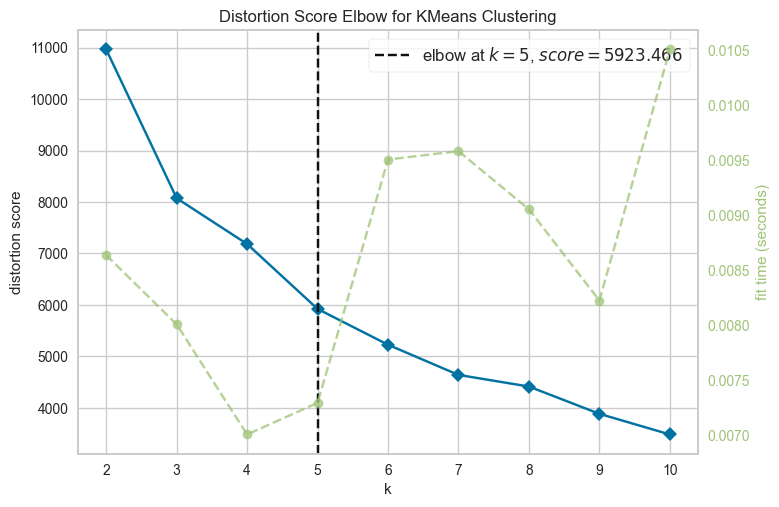

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

In [70]:
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans.fit(pca_df)

# cluster_labels = kmeans.labels_

In [71]:
# pca_df['Cluster'] = cluster_labels

In [72]:
# # Vẽ biểu đồ 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Tạo danh sách màu sắc cho các cụm
# colors = ['red', 'blue', 'green', 'orange']

# # Vẽ từng cụm
# for cluster in range(4):
#     cluster_data = pca_df[pca_df['Cluster'] == cluster]
#     ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
#                label=f'Cluster {cluster}', color=colors[cluster], s=50, alpha=0.7)

# # Gắn nhãn trục
# ax.set_xlabel('PCA1')
# ax.set_ylabel('PCA2')
# ax.set_zlabel('PCA3')

# # Thêm chú thích
# ax.legend()
# ax.set_title('3D Visualization of KMeans Clusters')

# # Hiển thị biểu đồ
# plt.show()

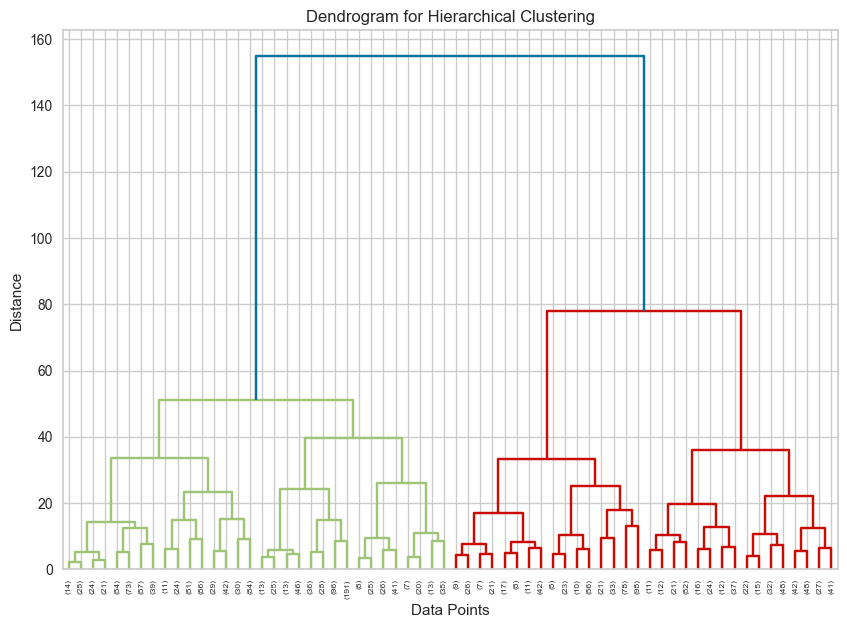

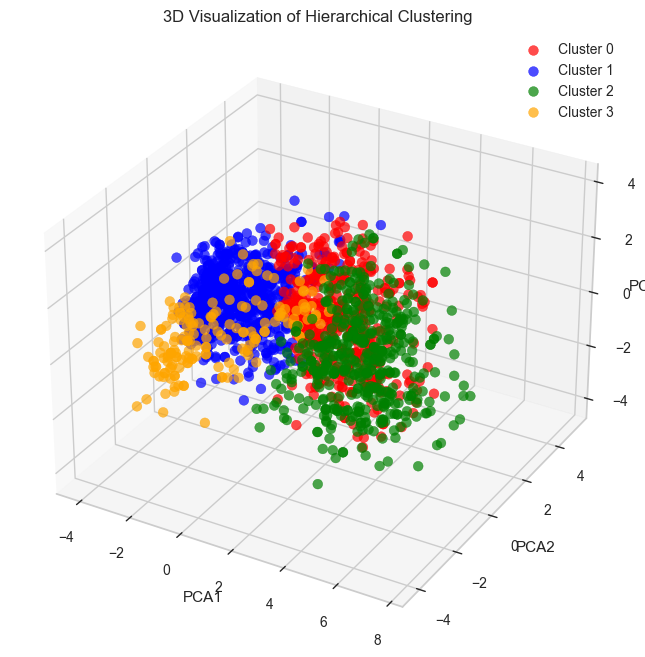

In [ ]:
# 1. Phân cụm phân cấp (Agglomerative Clustering)
# Sử dụng liên kết 'ward' (minimizes variance within clusters)
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = hierarchical.fit_predict(pca_df)

# Thêm nhãn cụm vào DataFrame
pca_df['Cluster'] = cluster_labels

# 2. Vẽ Dendrogram để trực quan hóa phân cấp
linked = linkage(pca_df[['PC1', 'PC2', 'PC3']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# 3. Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tạo danh sách màu sắc cho các cụm
colors = ['red', 'blue', 'green', 'orange']

# Vẽ từng cụm
for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster}', color=colors[cluster], s=50, alpha=0.7)

# Gắn nhãn trục
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Thêm chú thích
ax.legend()
ax.set_title('3D Visualization of Hierarchical Clustering')

# Hiển thị biểu đồ
plt.show()

In [74]:
data['Cluster'] = cluster_labels
data

Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Response  Age  Spent  Children  Customer_For  Family_Size  Is_Parent  Cluster
0             2  58138.0       58       635         88              546              172                88            88                8                   10                  4         1   57   1617         0           663            1          0        2
1             2  46344.0       38        11          1                6                2                 1             6                1                    1                  2         0   60     27         2           113            3          1        1
2             2  71613.0       26       426         49              127              111                21            42                8                    2                 10         0   49    776         0           312            2          0        2
3             2  26646.0       26        11          4               20               10                 3             5                2                    0                  4         0   30     53         1           139            3          1        4
4             4  58293.0       94       173         43              118               46                27            15                5                    3                  6         0   33    422         1           161            3          1        1
...         ...      ...      ...       ...        ...              ...              ...               ...           ...              ...                  ...                ...       ...  ...    ...       ...           ...          ...        ...      ...
2207          2  61223.0       46       709         43              182               42               118           247                9                    3                  4         0   47   1341         1           381            3          1        0
2208          4  64014.0       56       406          0               30                0                 0             8                8                    2                  5         0   68    444         3            19            5          1        1
2209          2  56981.0       91       908         48              217               32                12            24                2                    3                 13         0   33   1241         0           155            1          0        2
2210          3  69245.0        8       428         30              214               80                30            61                6                    5                 10         0   58    843         1           156            3          1        0
2211          4  52869.0       40        84          3               61                2                 1            21                3                    1                  4         1   60    172         2           622            4          1        1

[2212 rows x 20 columns]

In [75]:
raw_data['Cluster'] = cluster_labels
raw_data


ID  Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent  Cluster
0      5524          2  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   57   1617         0            0           663            1          0        2
1      2174          2  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   60     27         2            0           113            3          1        1
2      4141          2  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   49    776         0            1           312            2          0        2
3      6182          2  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   30     53         1            1           139            3          1        4
4      5324          4  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   33    422         1            1           161            3          1        1
...     ...        ...      ...      ...       ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...       ...  ...    ...       ...          ...           ...          ...        ...      ...
2207  10870          2  61223.0        0         1       46       709         43              182               42               118           247                  2                9                    3                  4                  5             0             0             0             0             0         0         0   47   1341         1            1           381            3          1        0
2208   4001          4  64014.0        2         1       56       406          0               30                0                 0             8                  7                8                    2                  5                  7             0             0             0             1             0         0         0   68    444         3            1            19            5          1        1
2209   7270          2  56981.0        0         0       91       908         48              217               32                12            24                  1                2                    3                 13                  6             0             1             0

In [ ]:
cluster_summary = raw_data.groupby('Cluster').mean()
print(cluster_summary)


                  ID  Education        Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response        Age        Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                            
0        5615.063043   2.593478  64624.932609  0.173913  0.958696  49.647826  579.478261  39.554348       201.845652        54.2

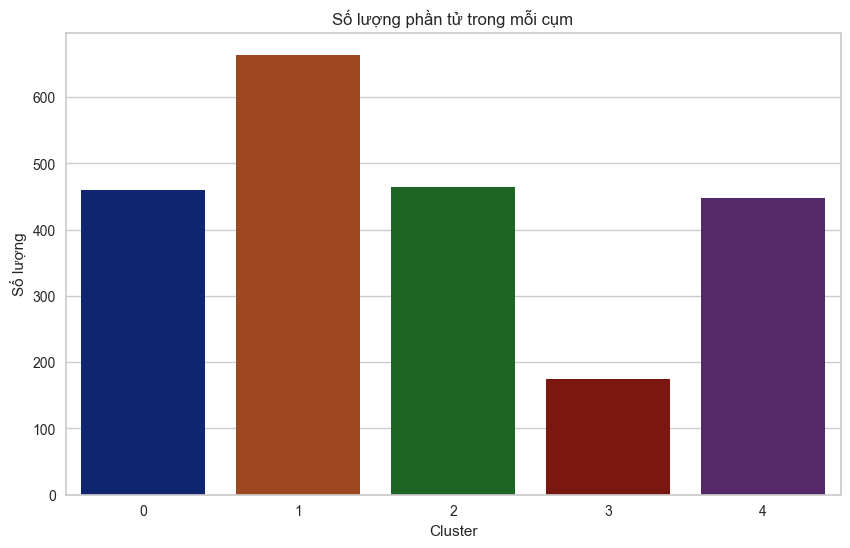

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=raw_data, palette='dark')
plt.title('Số lượng phần tử trong mỗi cụm')
plt.xlabel('Cluster')
plt.ylabel('Số lượng')
plt.show()


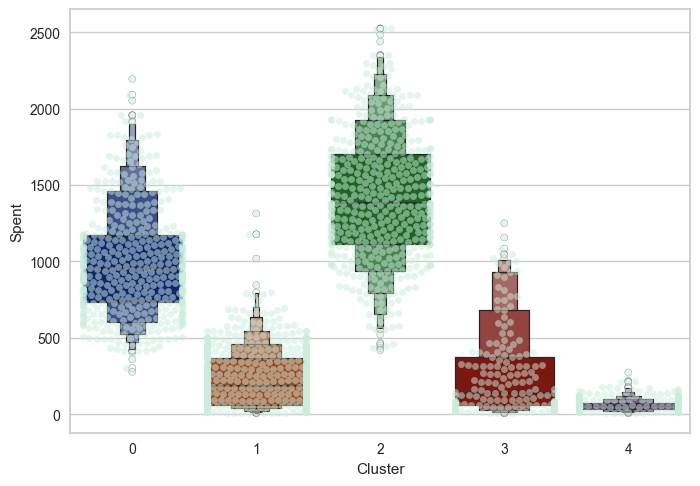

In [78]:
plt.figure()
pl=sns.swarmplot(x=data["Cluster"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Cluster"], y=data["Spent"], palette='dark')
plt.show()

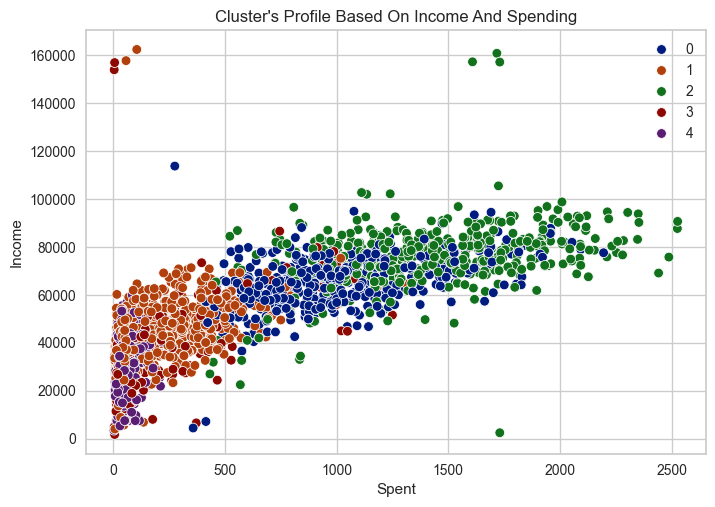

In [79]:
pl = sns.scatterplot(data = raw_data,x=raw_data["Spent"], y=raw_data["Income"],hue=raw_data["Cluster"], palette='dark')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

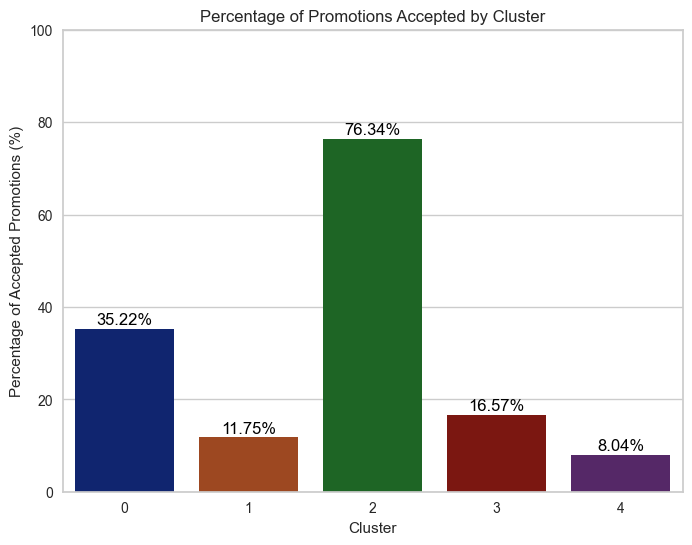

In [80]:
# Tạo cột tổng số khuyến mãi được chấp nhận
raw_data["Total_Promos"] = (
    raw_data["AcceptedCmp1"] + 
    raw_data["AcceptedCmp2"] + 
    raw_data["AcceptedCmp3"] + 
    raw_data["AcceptedCmp4"] + 
    raw_data["AcceptedCmp5"]
)

# Tính tổng số khách hàng trong mỗi cụm
cluster_total = raw_data.groupby("Cluster")["ID"].count()

# Tính tổng số khuyến mãi được chấp nhận trong mỗi cụm
cluster_promos = raw_data.groupby("Cluster")["Total_Promos"].sum()

# Tính tỷ lệ phần trăm chấp nhận khuyến mãi
percentage_promos = (cluster_promos / cluster_total) * 100

# Chuyển đổi thành DataFrame để dễ vẽ
percentage_df = percentage_promos.reset_index()
percentage_df.columns = ["Cluster", "Percentage"]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=percentage_df, x="Cluster", y="Percentage", palette="dark")

# Thêm giá trị phần trăm lên trên mỗi cột
for index, row in percentage_df.iterrows():
    ax.text(
        index,  # Vị trí x
        row["Percentage"] + 1,  # Vị trí y (cao hơn cột một chút)
        f'{row["Percentage"]:.2f}%',  # Giá trị phần trăm với 2 chữ số thập phân
        color='black',  # Màu chữ
        ha="center"  # Căn giữa theo chiều ngang
    )

# Tùy chỉnh biểu đồ
plt.title("Percentage of Promotions Accepted by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Percentage of Accepted Promotions (%)")
plt.ylim(0, 100)  # Đặt giới hạn trục Y từ 0 đến 100
plt.show()


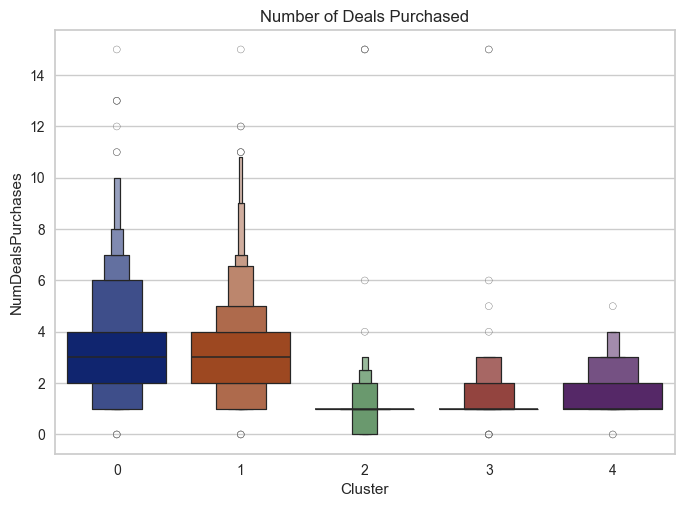

In [81]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=raw_data["NumDealsPurchases"],x=raw_data["Cluster"], palette= 'dark')
pl.set_title("Number of Deals Purchased")
plt.show()

In [82]:
def plot_kde_grid(data, personal_vars, ydata, cluster_col, palette="dark", grid_shape=(3, 3), figsize=(18, 15)):
    # Tạo lưới biểu đồ
    fig, axes = plt.subplots(nrows=grid_shape[0], ncols=grid_shape[1], figsize=figsize)
    axes = axes.flatten()  # Chuyển về dạng 1D để dễ duyệt qua

    # Duyệt qua danh sách các biến
    for idx, var in enumerate(personal_vars):
        if idx < len(axes):  # Đảm bảo không vượt quá số ô trong lưới
            sns.kdeplot(
                x=data[var],
                y=data[ydata],
                hue=data[cluster_col],
                palette=palette,
                ax=axes[idx]
            )
            axes[idx].set_title(f"{var} vs {ydata}")  # Tiêu đề cho từng biểu đồ

    # Ẩn các ô không sử dụng (nếu có)
    for i in range(len(personal_vars), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()  # Tự động căn chỉnh khoảng cách giữa các biểu đồ
    plt.show()


In [83]:
# Danh sách các biến trong Personal
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Family_Size", "Education", "Children", "Living_With", "Is_Parent"]

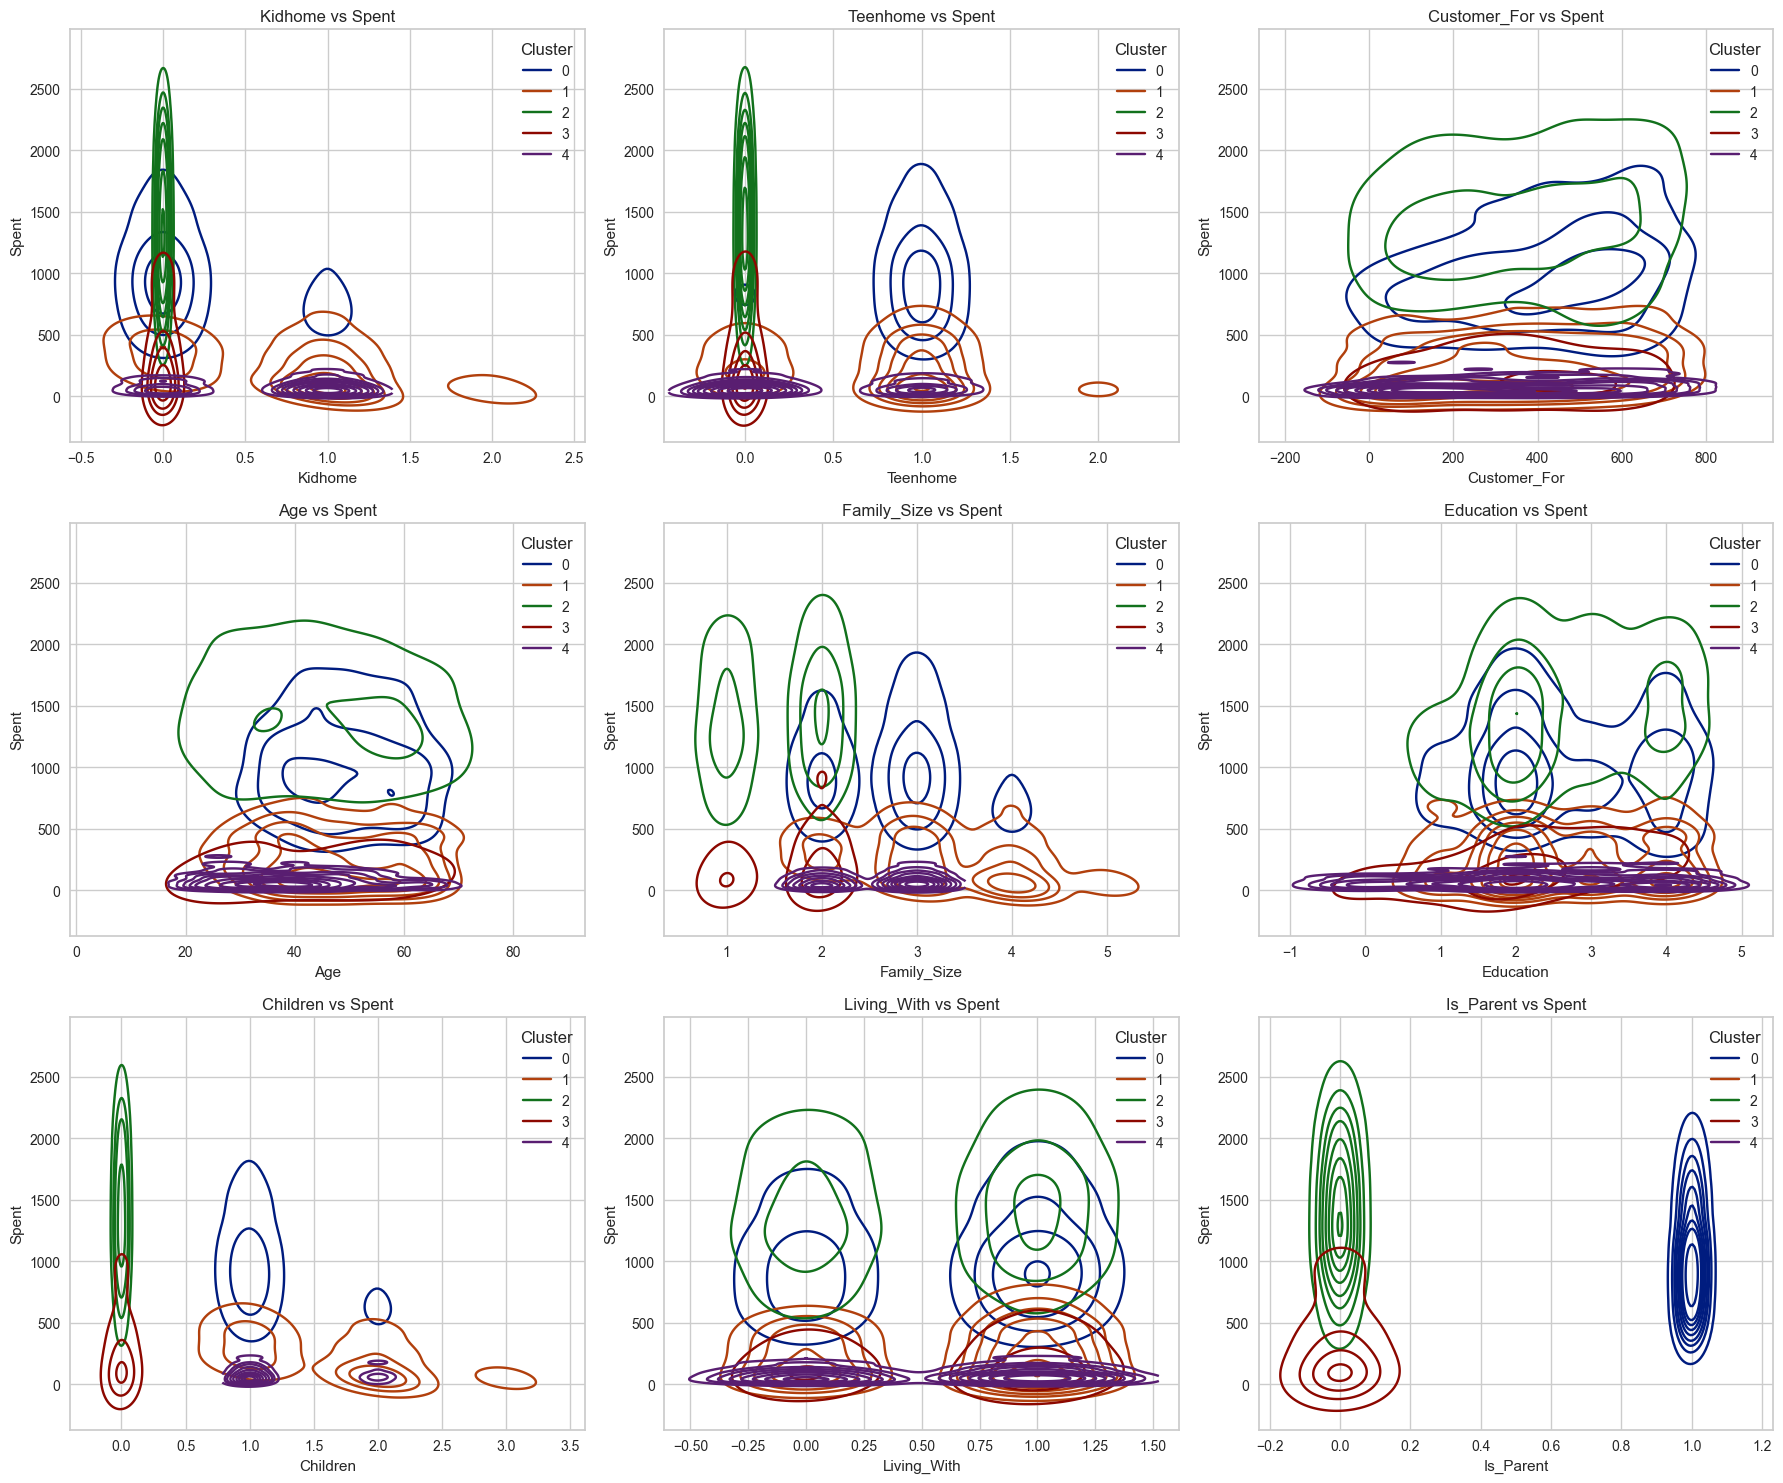

In [ ]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="Spent",
    cluster_col="Cluster"
)

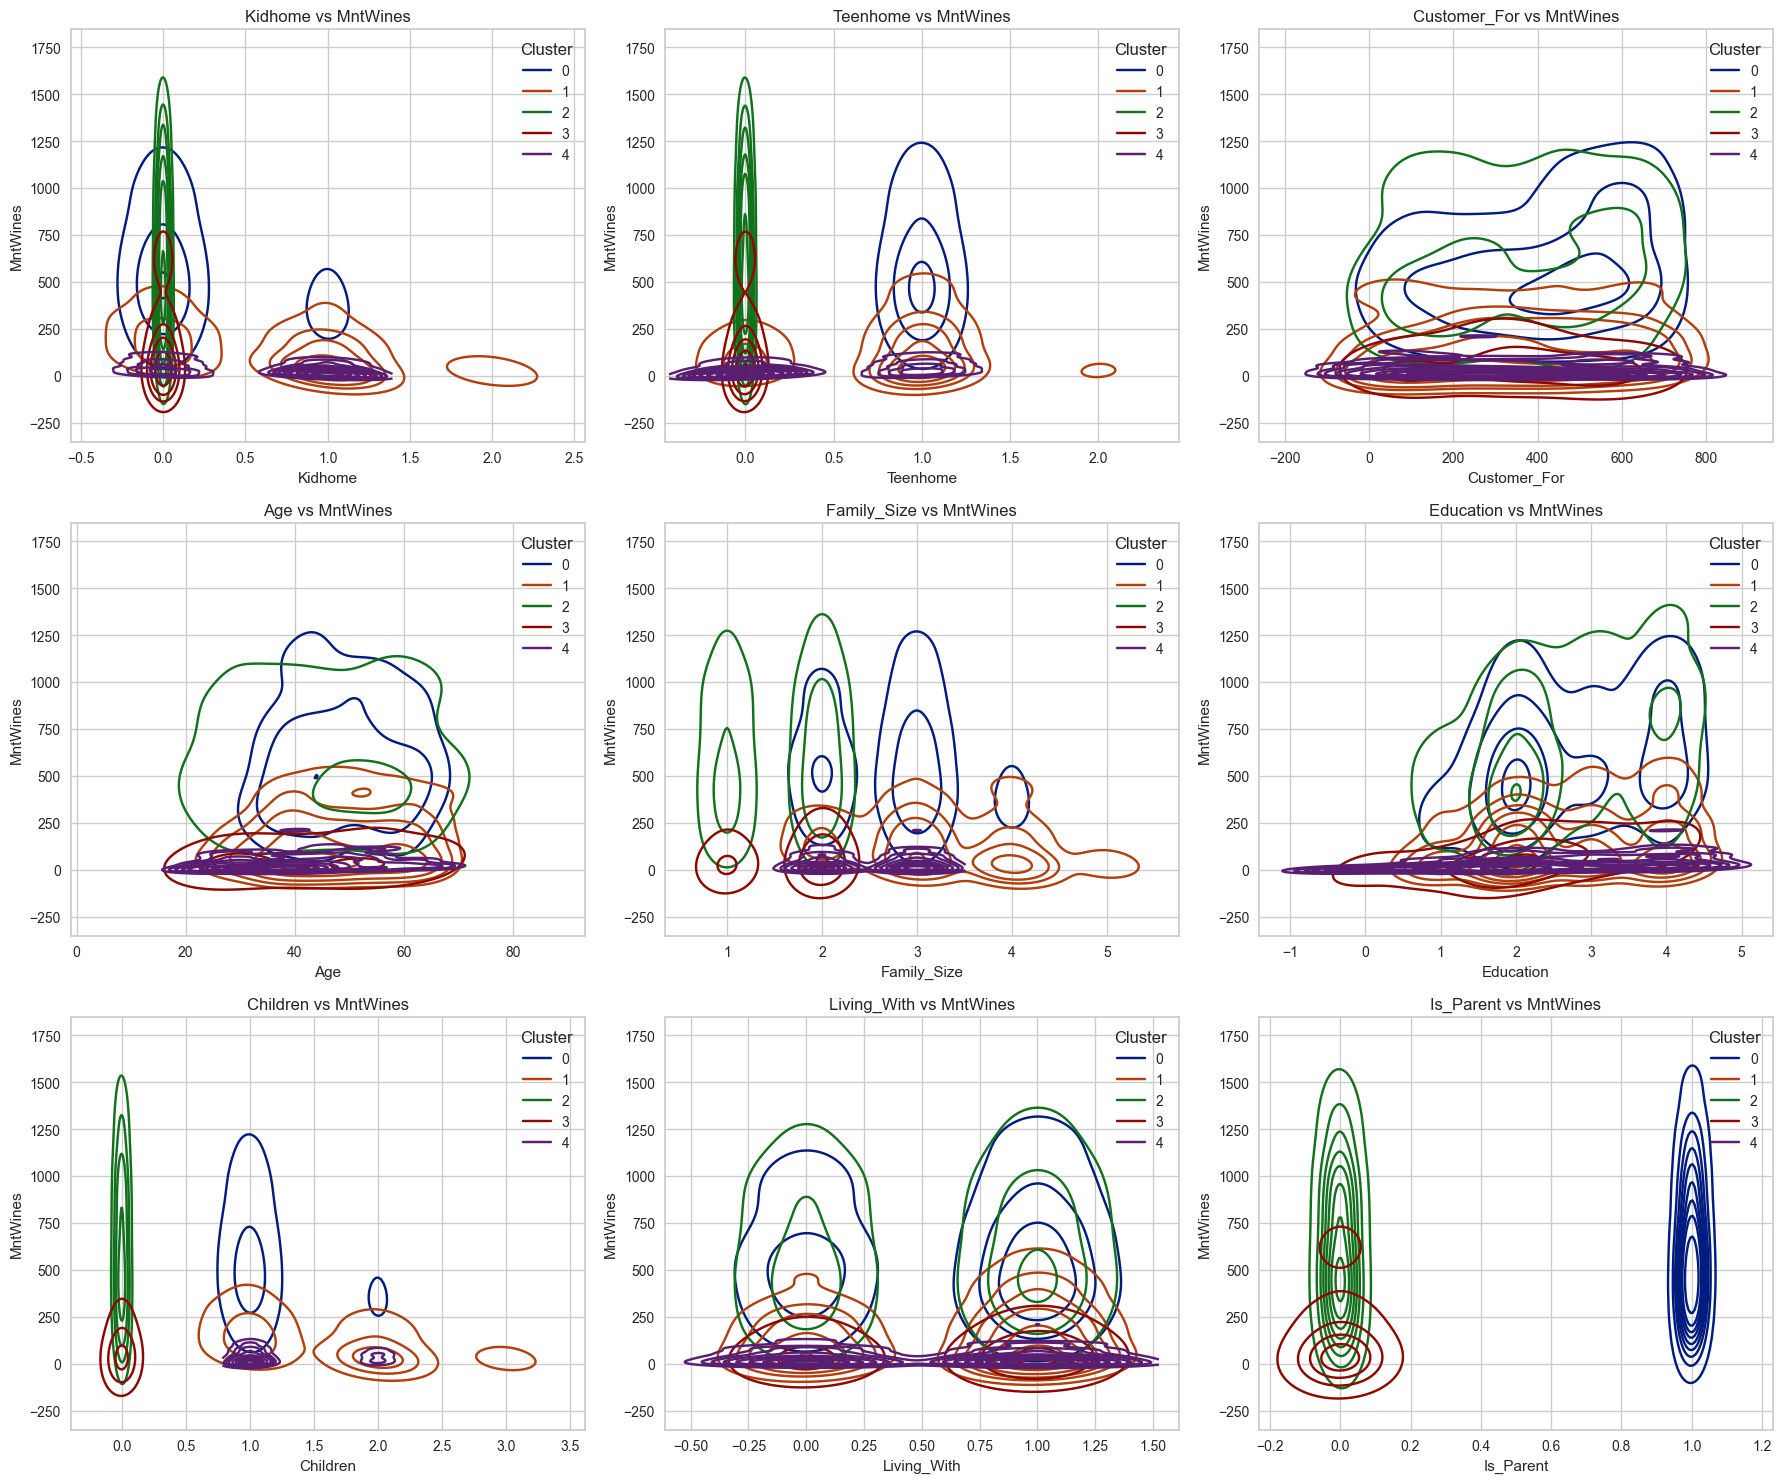

In [ ]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntWines",
    cluster_col="Cluster"
)

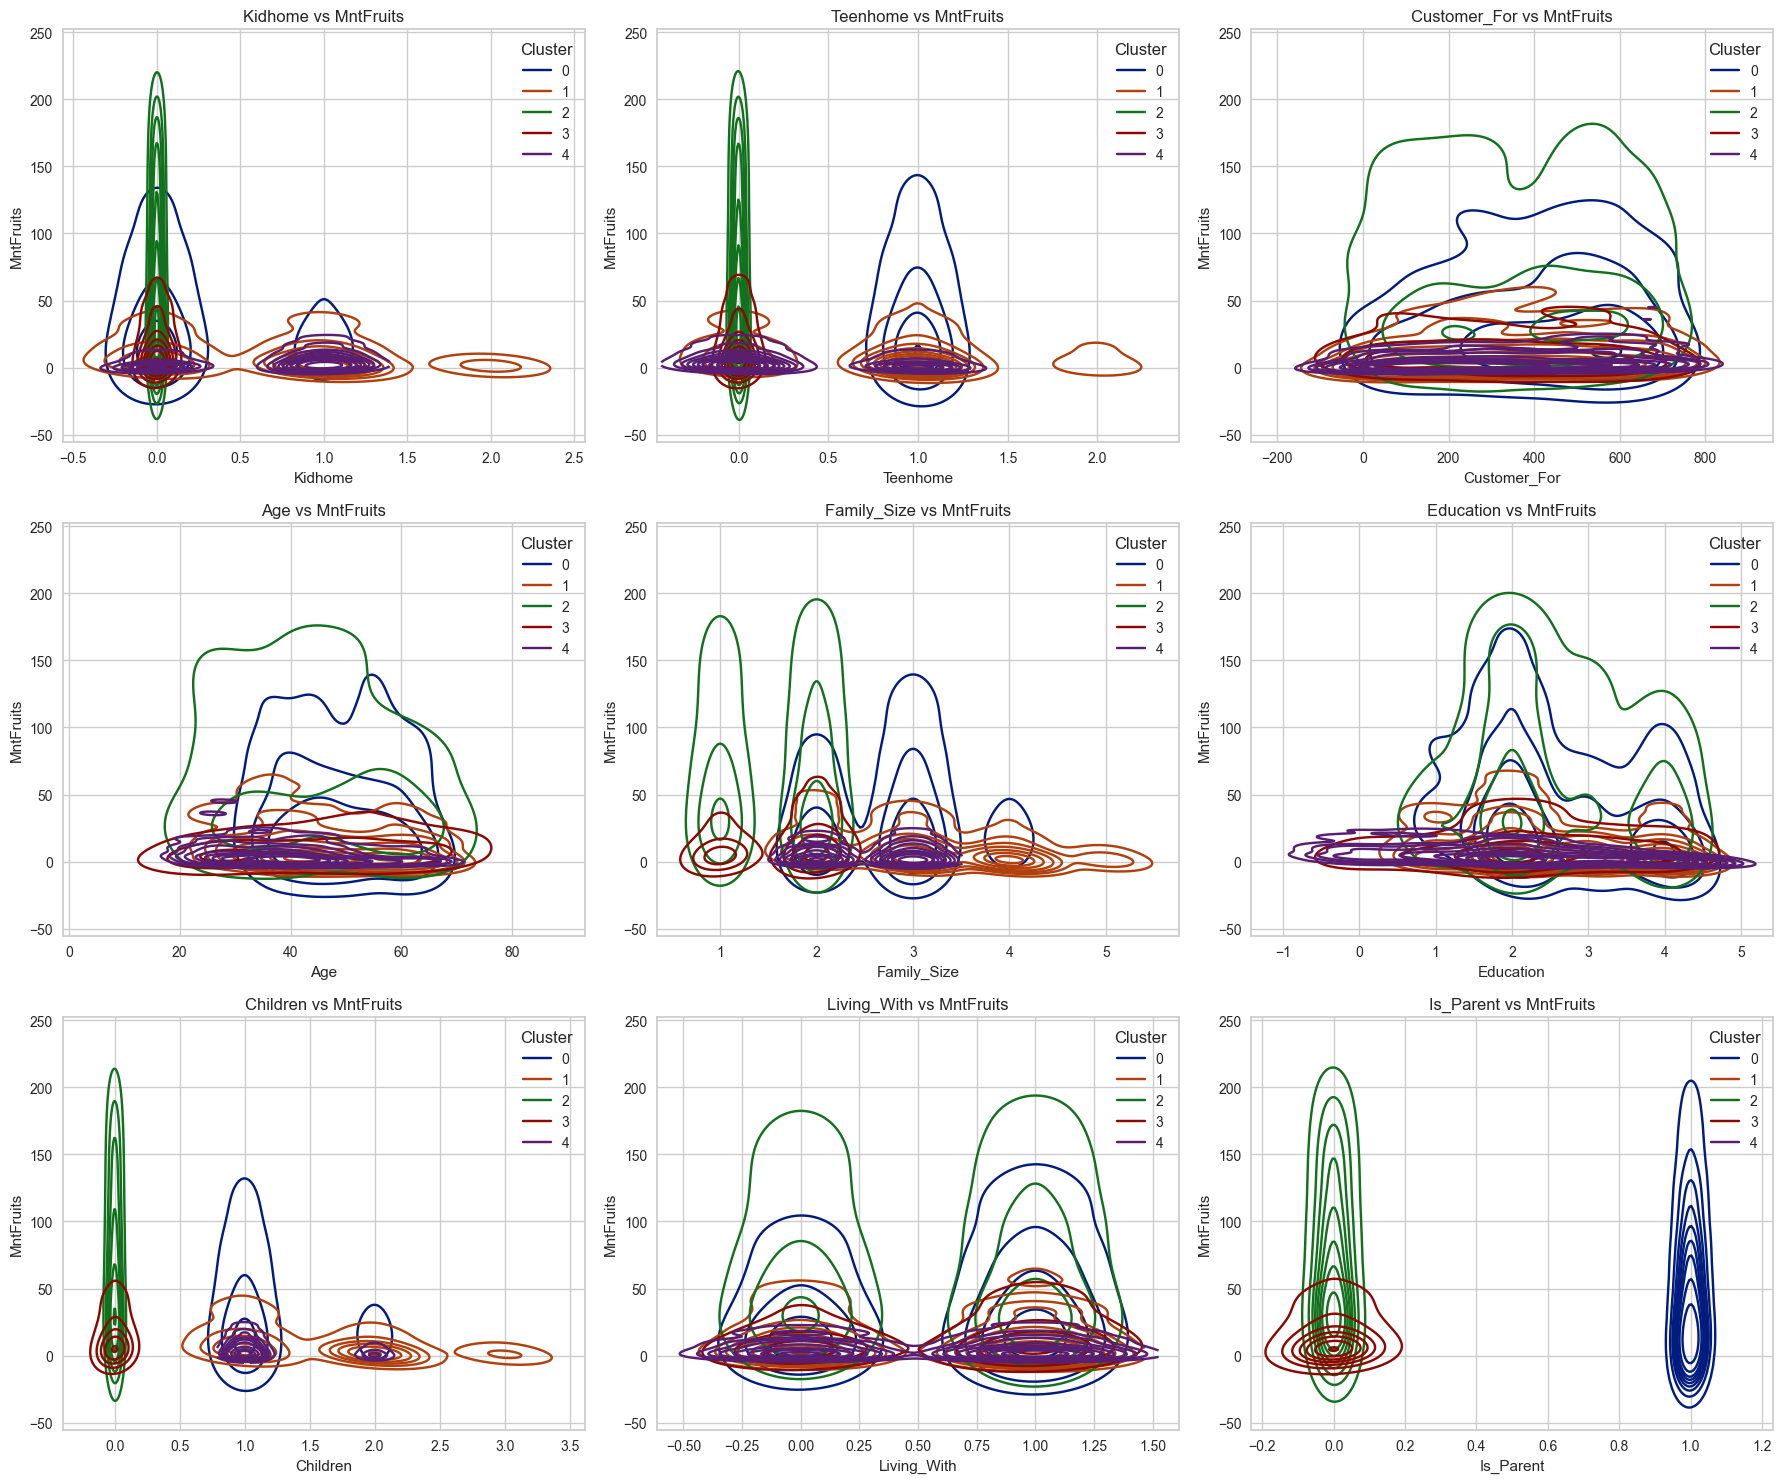

In [ ]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntFruits",
    cluster_col="Cluster"
)

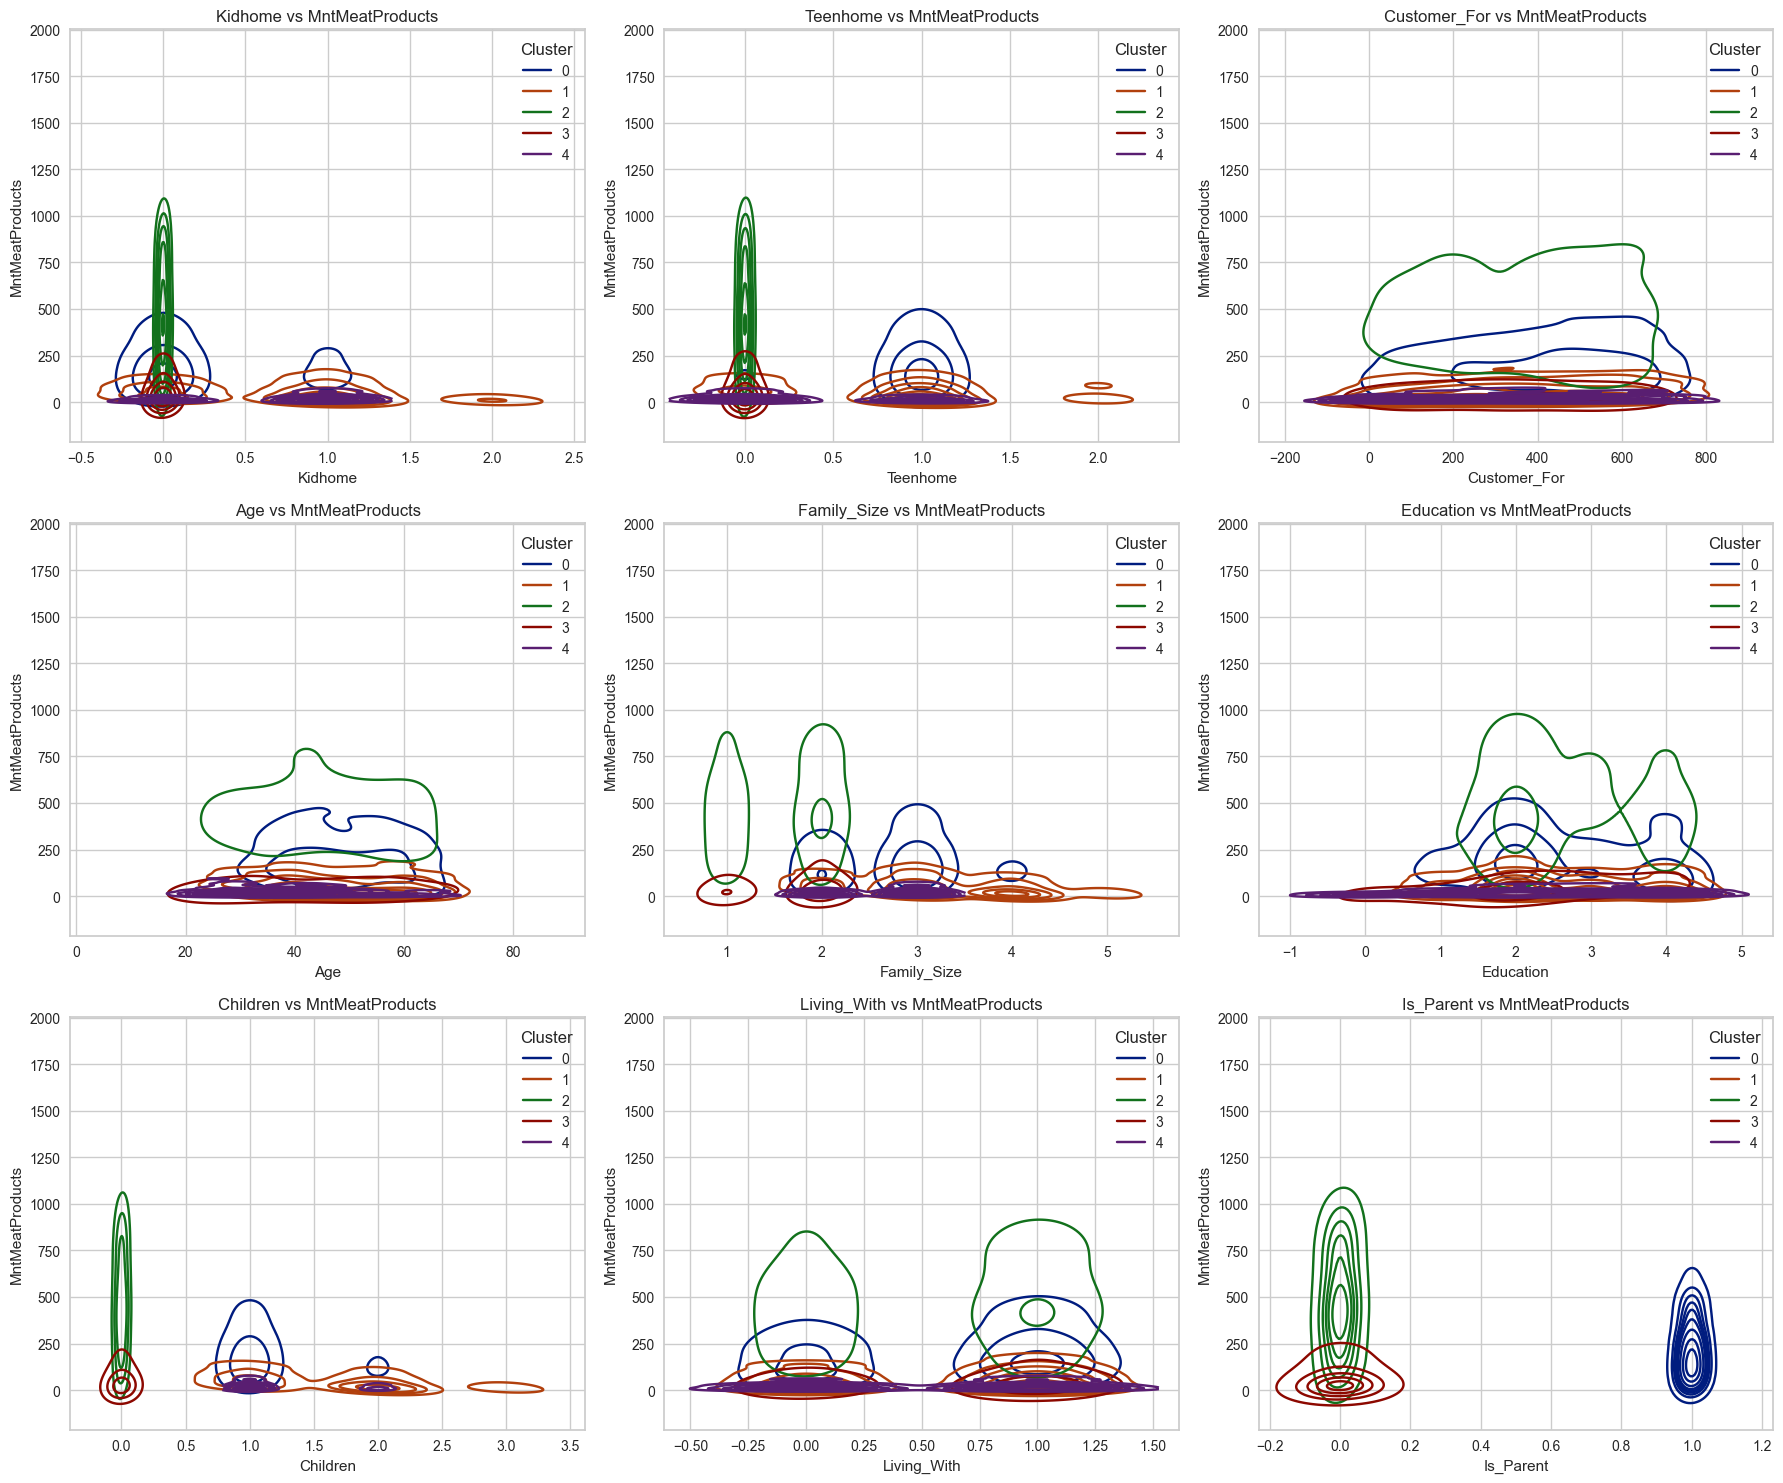

In [ ]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntMeatProducts",
    cluster_col="Cluster"
)

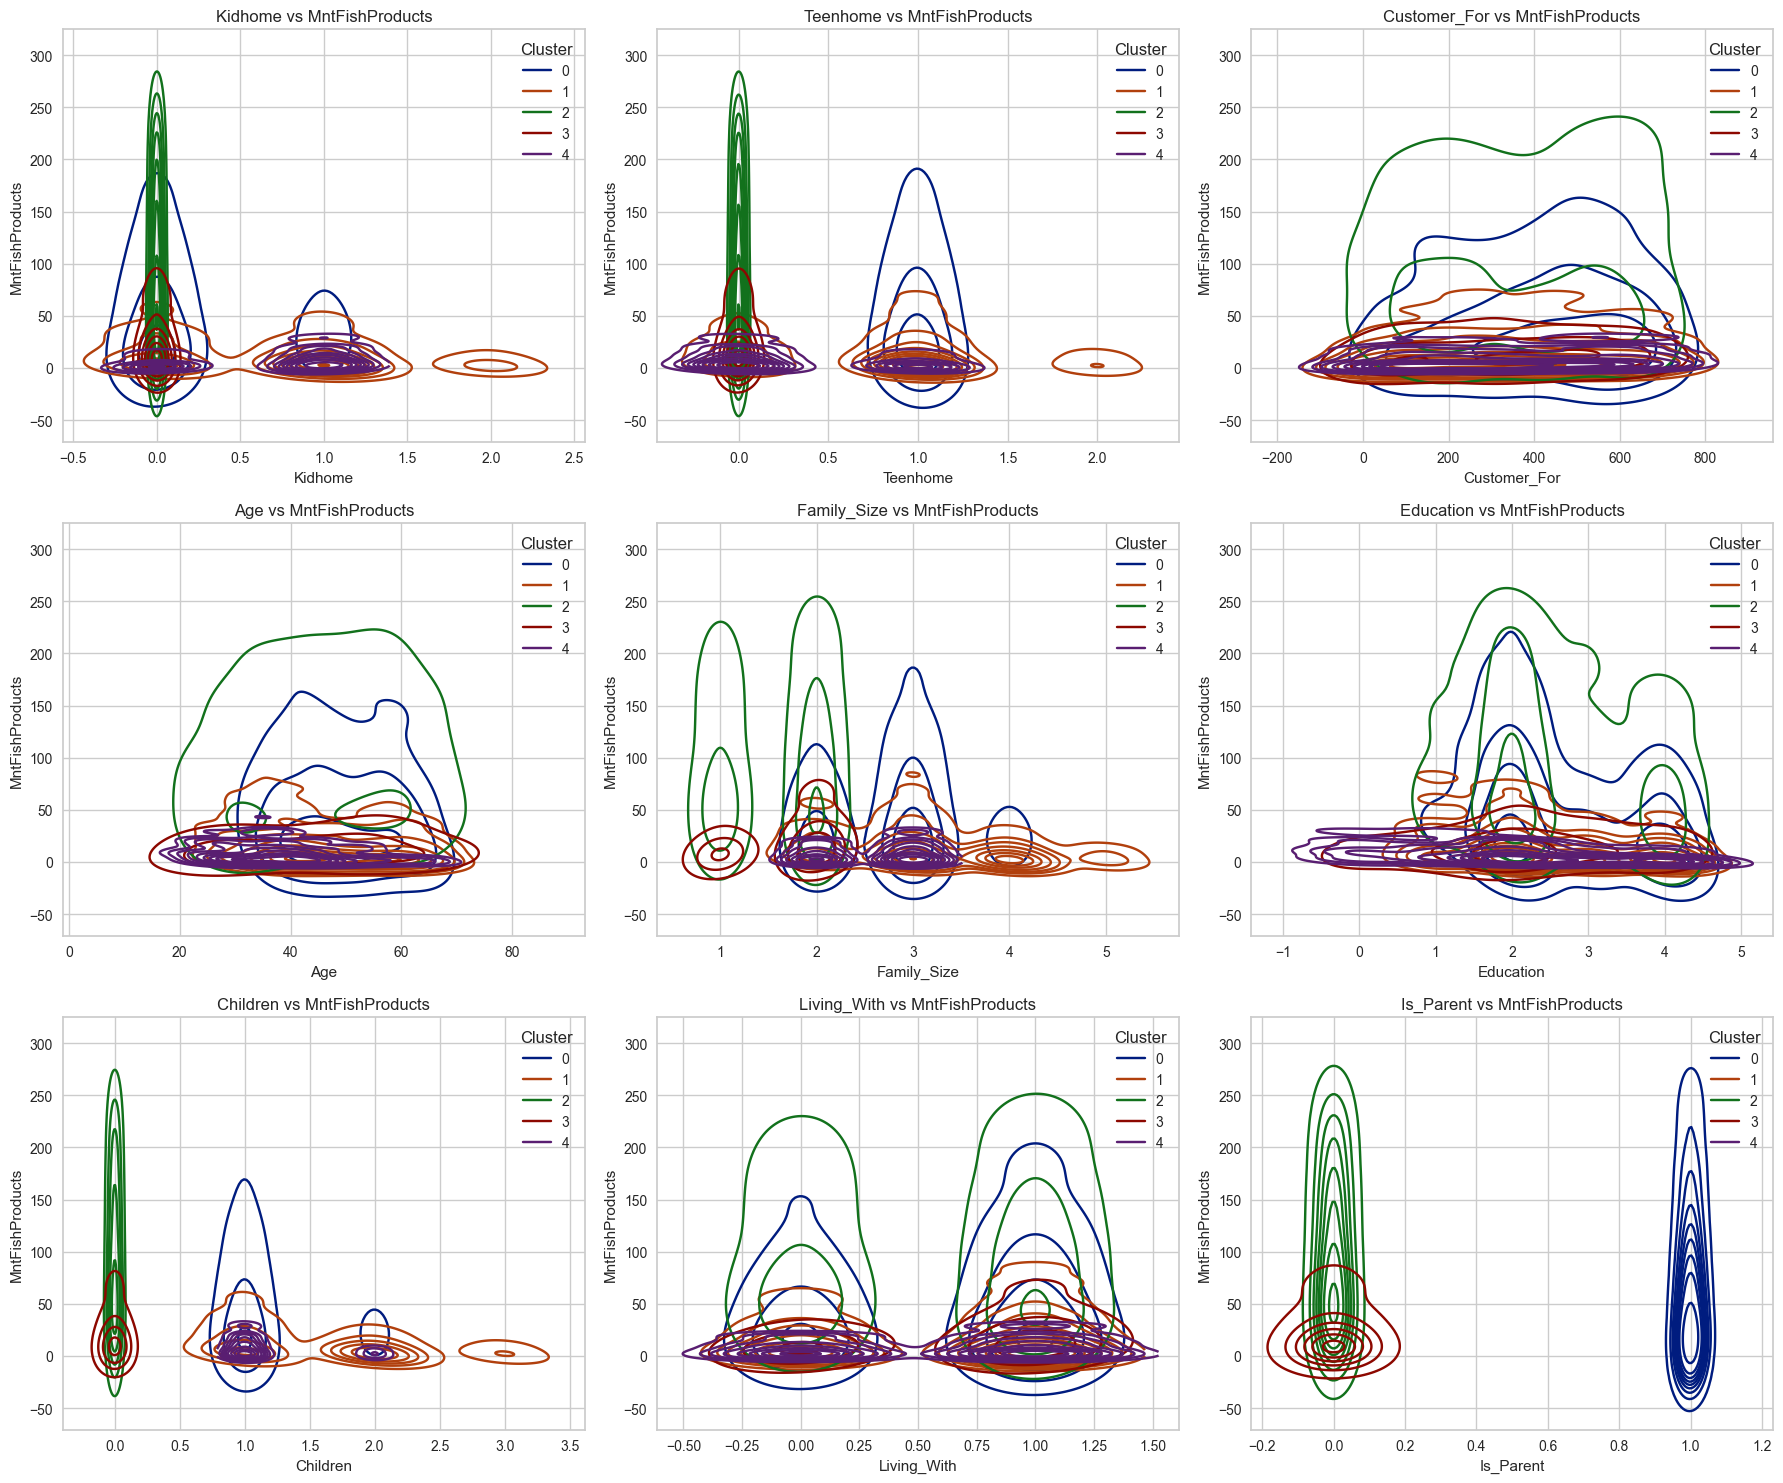

In [ ]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntFishProducts",
    cluster_col="Cluster"
)

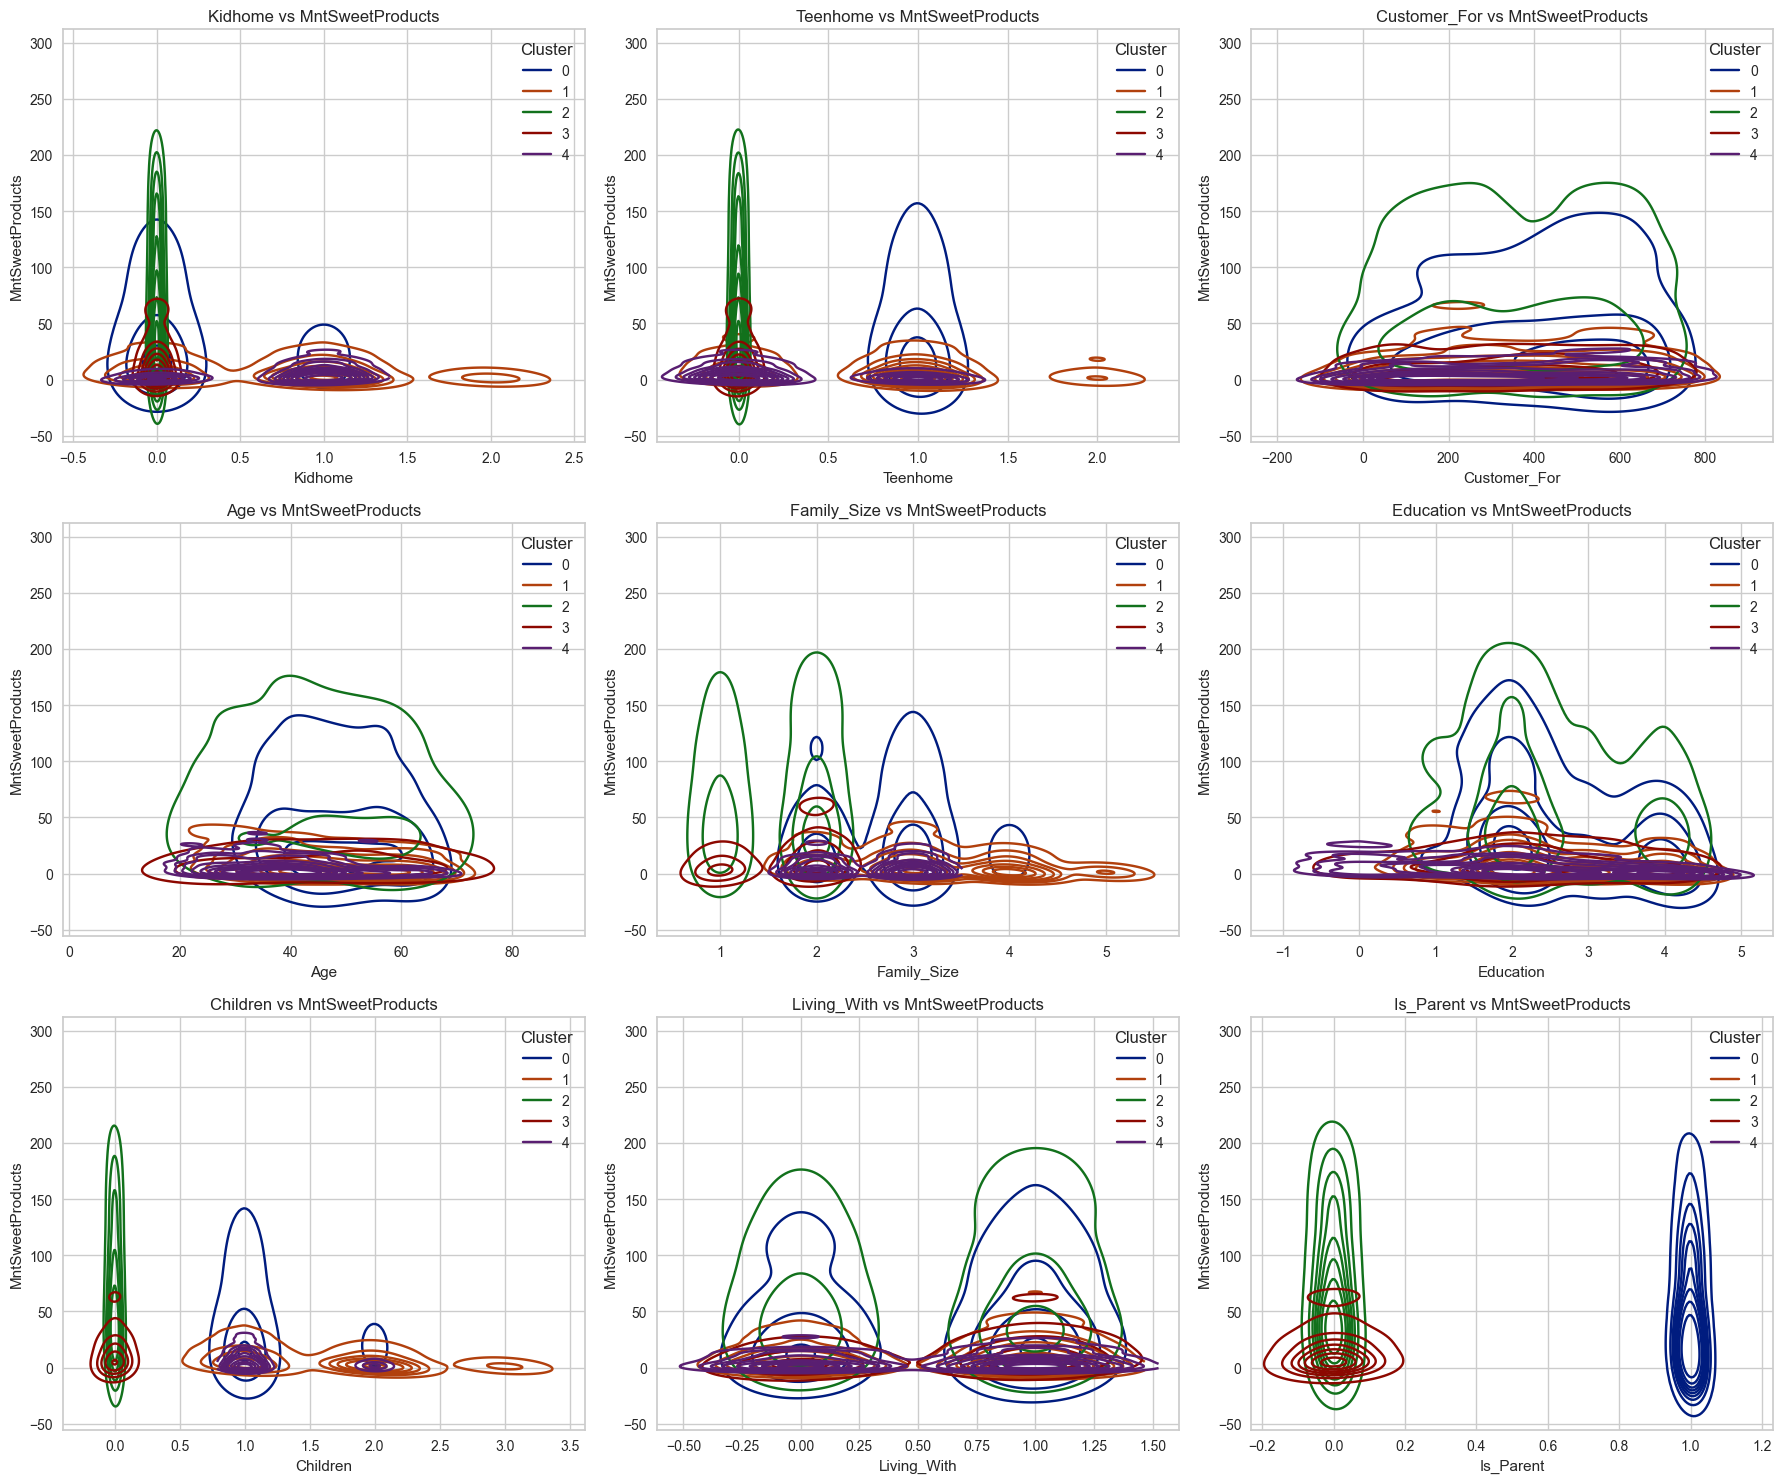

In [89]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntSweetProducts",
    cluster_col="Cluster"
)